In [2]:
# read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("Housing.csv")
print(data.head())

# handle missing values if any
data['price'] = data['price'].fillna(data['price'].median())
data['area'] = data['area'].fillna(data['area'].median())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Text(0.5, 1.0, 'Price Boxplot')

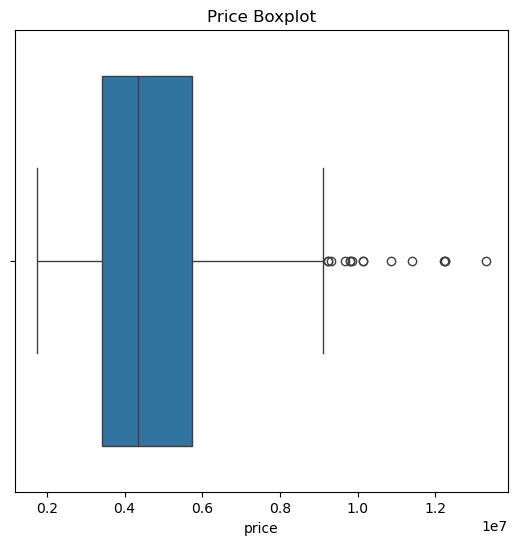

In [10]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['price'])
plt.title("Price Boxplot")

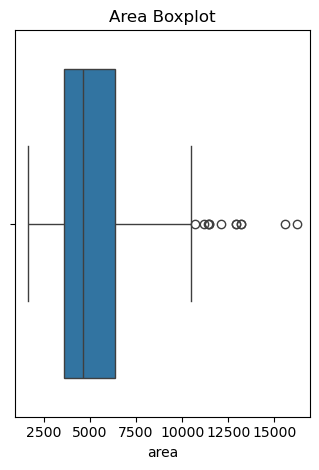

In [6]:
plt.subplot(1, 2, 2)
sns.boxplot(x=data['area'])
plt.title("Area Boxplot")
plt.tight_layout()
plt.show()

In [12]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_price = data['price'].median()
data['price'] = data['price'].apply(lambda x: median_price if x < lower_bound or x > upper_bound else x)


In [13]:
Q1_area = data['area'].quantile(0.25)
Q3_area = data['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

median_area = data['area'].median()
data['area'] = data['area'].apply(lambda x: median_area if x < lower_bound_area or x > upper_bound_area else x)

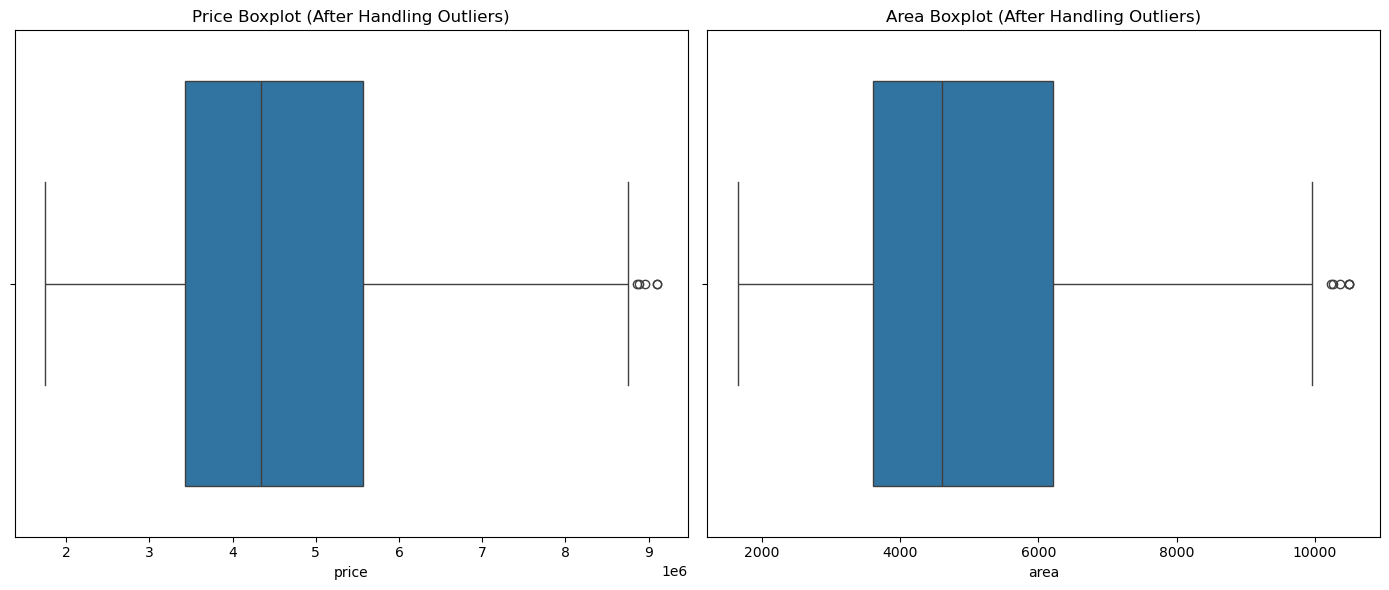

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['price'])
plt.title("Price Boxplot (After Handling Outliers)")

plt.subplot(1, 2, 2)
sns.boxplot(x=data['area'])
plt.title("Area Boxplot (After Handling Outliers)")
plt.tight_layout()
plt.show()

In [15]:
# a) Apply feature transformation techniques
# log transformation
data['log_price'] = np.log1p(data['price'])
data['log_area'] = np.log1p(data['area'])

# scaling
scaler = StandardScaler()
data[['price_scaled', 'area_scaled']] = scaler.fit_transform(data[['price', 'area']])


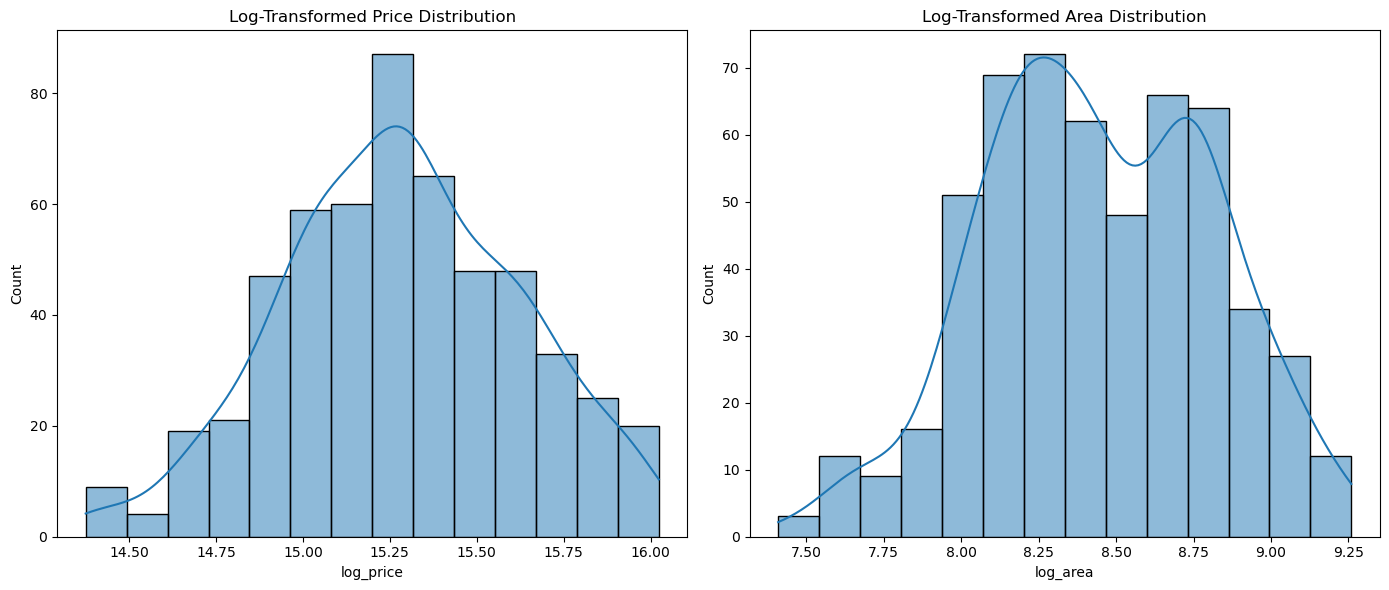

In [16]:
# visualize transformed data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['log_price'], kde=True)
plt.title("Log-Transformed Price Distribution")

plt.subplot(1, 2, 2)
sns.histplot(data['log_area'], kde=True)
plt.title("Log-Transformed Area Distribution")
plt.tight_layout()
plt.show()


In [17]:
# b) Engineer new features by combining existing ones
data['price_per_sqft'] = data['price'] / data['area']
data['bathroom_per_bedroom'] = data['bathrooms'] / data['bedrooms']
data['total_rooms'] = data['bedrooms'] + data['bathrooms']

# replace infinity (division by zero) with 0
data.replace([np.inf, -np.inf], 0, inplace=True)

Text(0.5, 1.0, 'Price per Sqft vs Area')

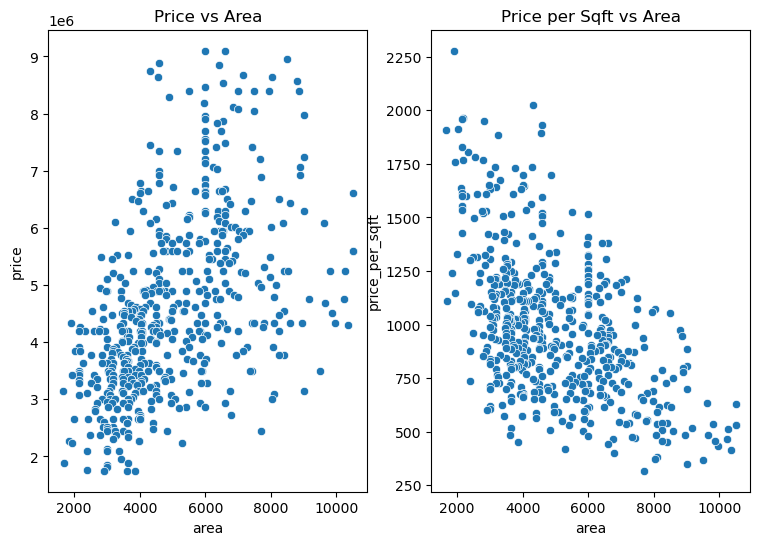

In [18]:
# visualize relationships of new features
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='area', y='price', data=data)
plt.title("Price vs Area")

plt.subplot(1, 3, 2)
sns.scatterplot(x='area', y='price_per_sqft', data=data)
plt.title("Price per Sqft vs Area")

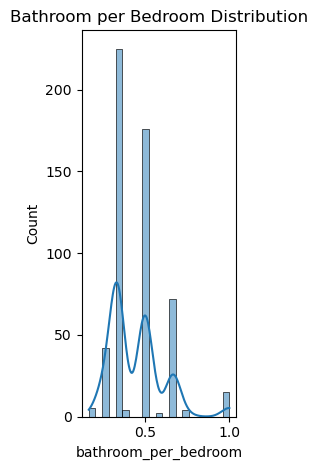


Cleaned and Enhanced Dataset Summary:
              price          area   log_price    log_area  price_per_sqft  \
count  5.450000e+02    545.000000  545.000000  545.000000      545.000000   
mean   4.593489e+06   4972.341284   15.282511    8.444594      987.199529   
std    1.574539e+06   1835.540487    0.341883    0.369886      332.948399   
min    1.750000e+06   1650.000000   14.375127    7.409136      318.181818   
25%    3.430000e+06   3600.000000   15.048071    8.188967      745.370370   
50%    4.340000e+06   4600.000000   15.283385    8.434029      950.000000   
75%    5.565000e+06   6210.000000   15.532008    8.734077     1163.294798   
max    9.100000e+06  10500.000000   16.023785    9.259226     2278.215223   

       bathroom_per_bedroom  total_rooms  
count            545.000000   545.000000  
mean               0.446361     4.251376  
std                0.159492     1.036611  
min                0.166667     2.000000  
25%                0.333333     4.000000  
50%      

In [19]:
plt.subplot(1, 3, 3)
sns.histplot(data['bathroom_per_bedroom'], kde=True)
plt.title("Bathroom per Bedroom Distribution")
plt.tight_layout()
plt.show()

# summary of new transformed and engineered features
print("\nCleaned and Enhanced Dataset Summary:")
print(data[['price', 'area', 'log_price', 'log_area', 'price_per_sqft', 'bathroom_per_bedroom', 'total_rooms']].describe())
